In [1]:
import pickle
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pickle_in = open("braintumordata.pickle","rb")
data = pickle.load(pickle_in)

pickle_in = open("braintumorlabels.pickle","rb")
labels = pickle.load(pickle_in)

In [3]:
data = np.array(data)
labels = np.array(labels)

In [4]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.3)
test_data, val_data, test_labels, val_labels = train_test_split(test_data, test_labels, test_size = 0.5)


In [5]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]
n_test = test_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))
print("Number of testing examples: {}".format(n_test))

print("Training images are of shape: {}".format(train_data.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_data.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))
print("Test images are of shape: {}".format(test_data.shape))
print("Test labels are of shape: {}".format(test_labels.shape))

Number of training examples: 2284
Number of validation examples: 490
Number of testing examples: 490
Training images are of shape: (2284, 224, 224, 3)
Training labels are of shape: (2284,)
Validation images are of shape: (490, 224, 224, 3)
Validation labels are of shape: (490,)
Test images are of shape: (490, 224, 224, 3)
Test labels are of shape: (490,)


In [6]:
categories = ['gliom_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

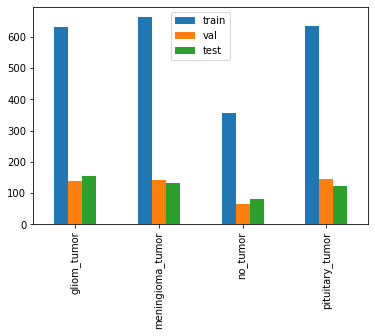

In [8]:
_, train_counts = np.unique(train_labels, return_counts = True)
_, val_counts = np.unique(val_labels, return_counts = True)
_, test_counts = np.unique(test_labels, return_counts = True)

pd.DataFrame({'train': train_counts, "val": val_counts, "test": test_counts}, index = categories).plot.bar()

plt.show()

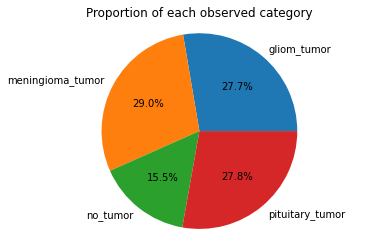

In [9]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0) , 
        labels=categories,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

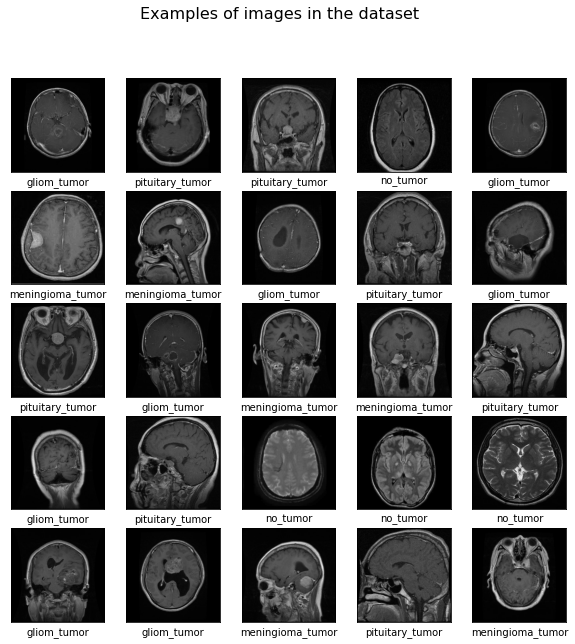

In [10]:
def display_examples(categories, images, labels):
    fig = plt.figure(figsize = (10,10))
    fig.suptitle("Examples of images in the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(categories[labels[i]])
    plt.show()
    
display_examples(categories, train_data, train_labels)